In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

url = 'https://github.com/GPadaka19/BBCA-Price-Prediction/blob/main/BBCA.csv?raw=true'
df = pd.read_csv(url)
print(df.head())
print(df.tail())
print(df.describe())
print(df.info())

    timestamp  open  low  high  close  volume
0  2001-04-16   175  175   180    177       0
1  2001-04-17   175  175   180    177       0
2  2001-04-18   175  175   180    177       0
3  2001-04-19   175  175   180    177       0
4  2001-04-20   175  175   180    177       0
       timestamp  open   low  high  close     volume
5665  2023-01-02  8575  8500  8600   8550   10653900
5666  2023-01-03  8550  8525  8600   8550   27399100
5667  2023-01-04  8525  8350  8575   8350   90918800
5668  2023-01-05  8350  8150  8375   8250  128838500
5669  2023-01-06  8100  8100  8325   8300   69286600
              open          low         high        close        volume
count  5670.000000  5670.000000  5670.000000  5670.000000  5.670000e+03
mean   2418.109877  2393.385538  2442.639506  2418.603175  8.919048e+07
std    2379.071545  2357.118837  2400.150856  2378.798150  1.274925e+08
min     175.000000   175.000000   177.000000   177.000000  0.000000e+00
25%     460.000000   455.000000   467.000000  

In [22]:
df = df.drop('volume', axis=1)
print(df.head())

    timestamp  open  low  high  close
0  2001-04-16   175  175   180    177
1  2001-04-17   175  175   180    177
2  2001-04-18   175  175   180    177
3  2001-04-19   175  175   180    177
4  2001-04-20   175  175   180    177


In [23]:
print(df.isnull().sum())

timestamp    0
open         0
low          0
high         0
close        0
dtype: int64


In [24]:
print(df.duplicated().sum())

0


In [25]:
print(df.dtypes)

timestamp    object
open          int64
low           int64
high          int64
close         int64
dtype: object


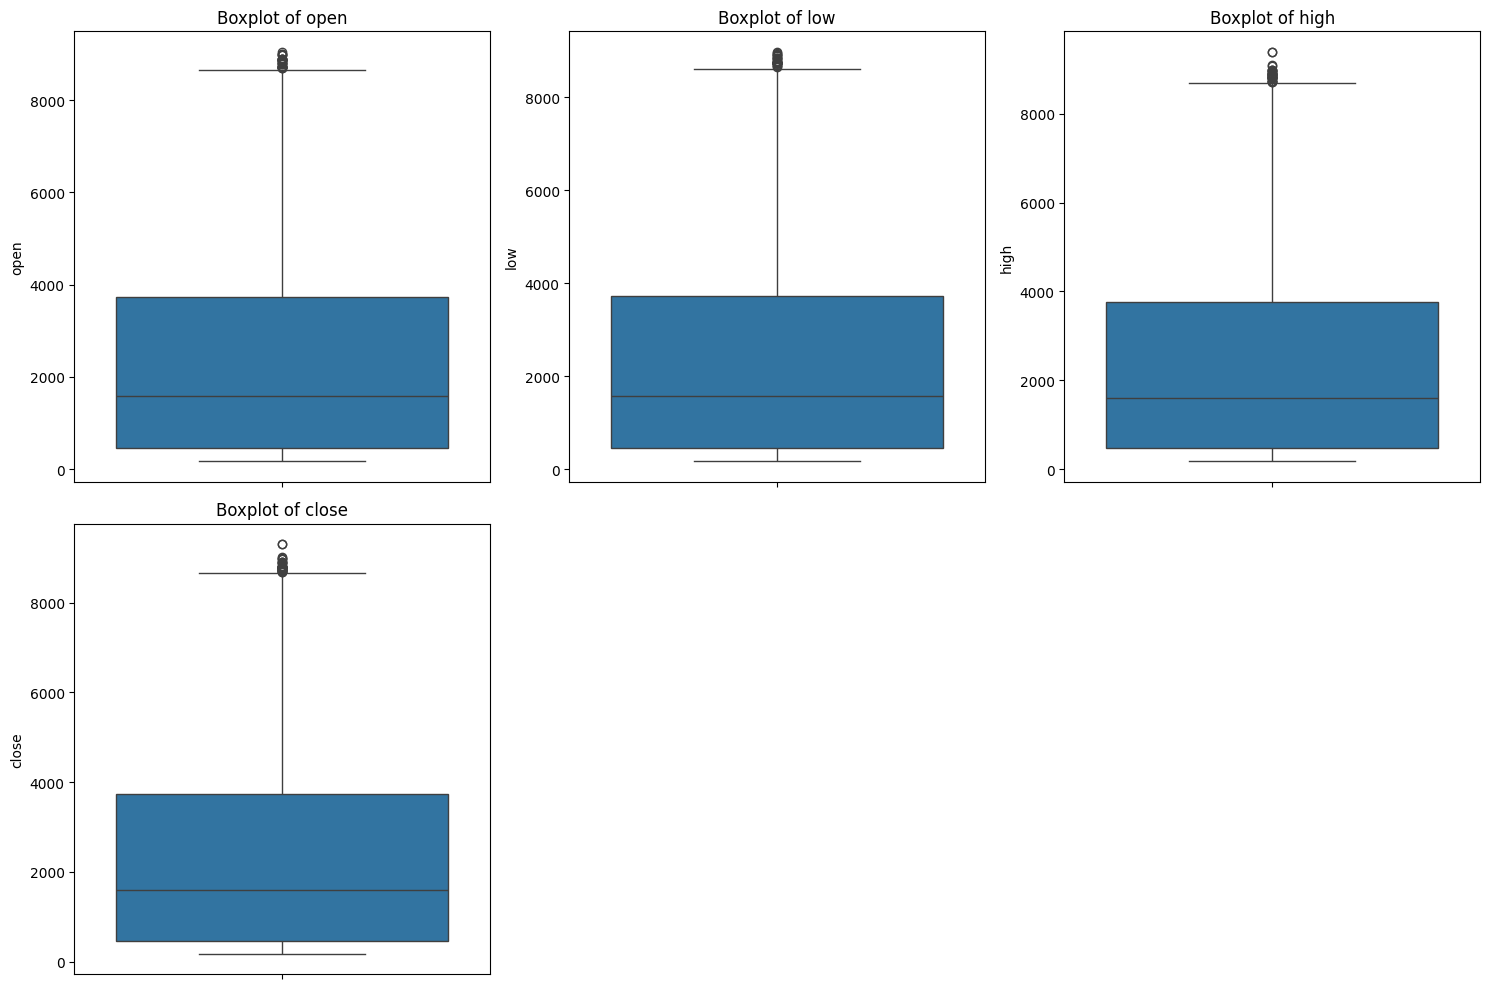

In [26]:
columns_to_visualize = df.columns[df.columns != 'timestamp']

num_columns = 3
num_rows = math.ceil(len(columns_to_visualize) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

axes = axes.flatten()

for idx, column in enumerate(columns_to_visualize):
    sns.boxplot(y=df[column], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {column}')

for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

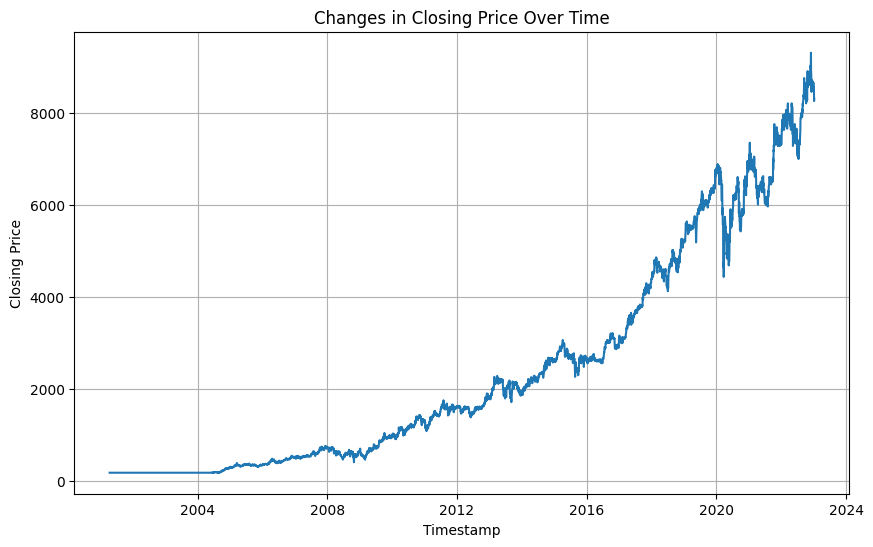

In [27]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.set_index('timestamp', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['close'])
plt.title('Changes in Closing Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

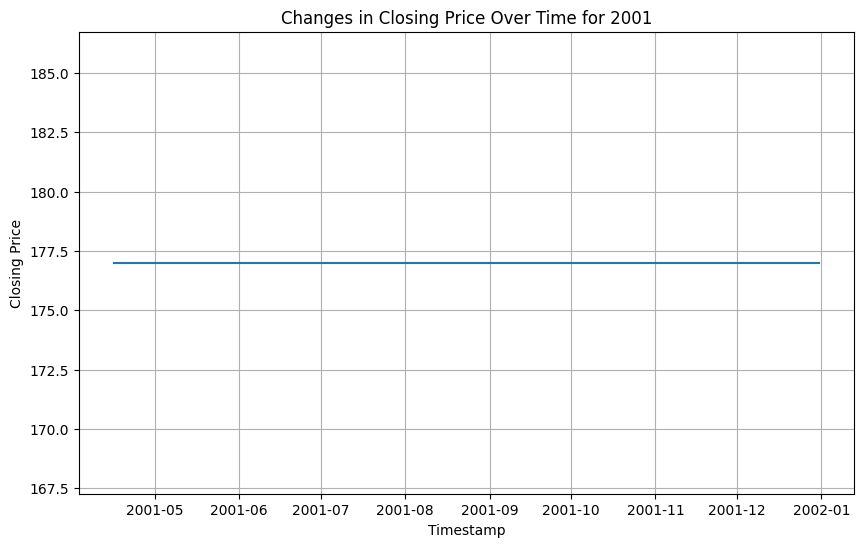

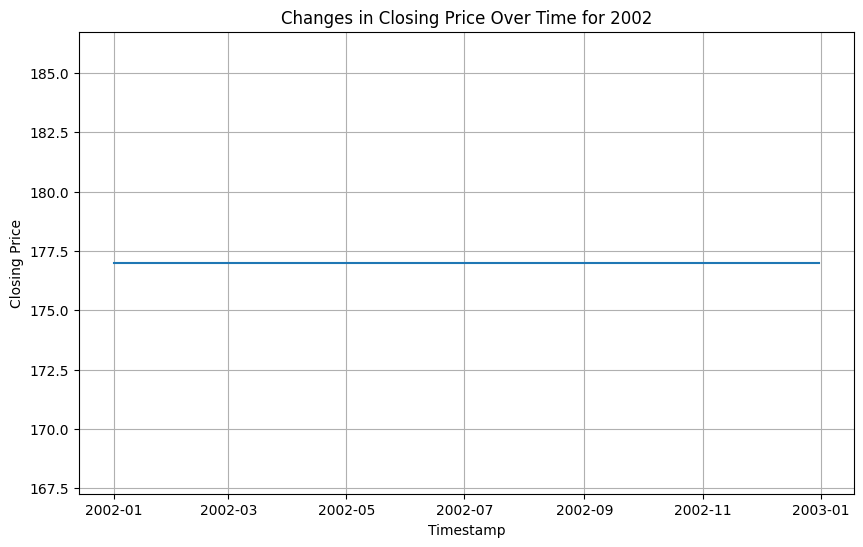

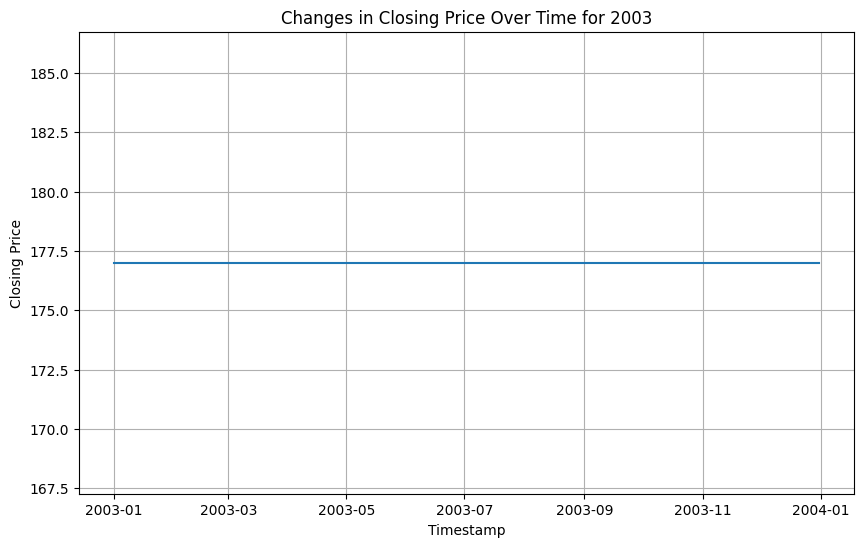

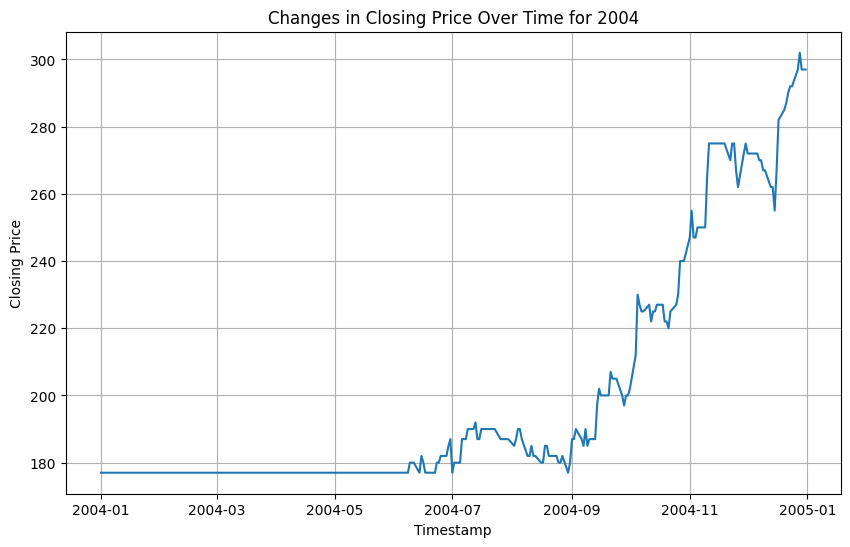

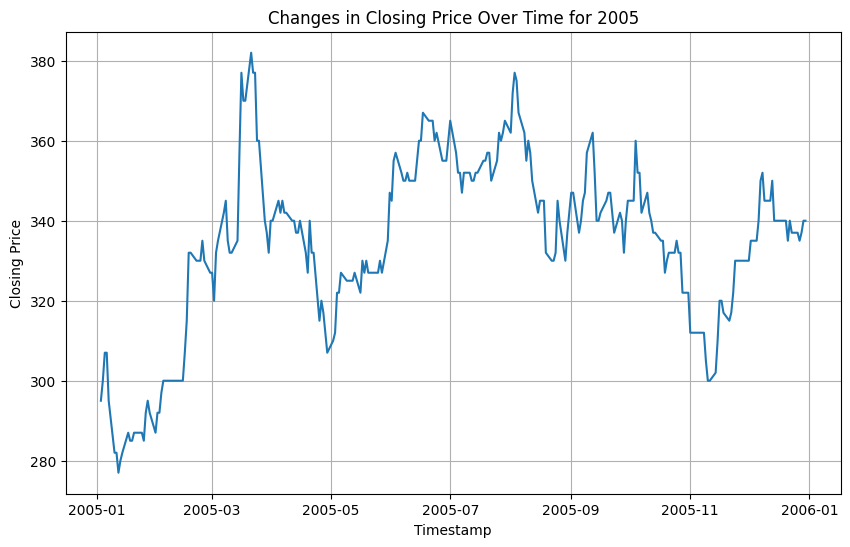

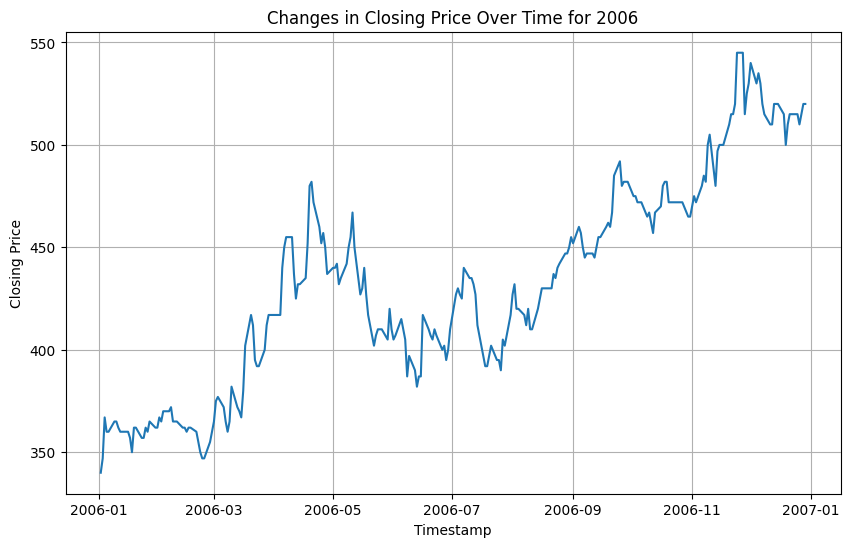

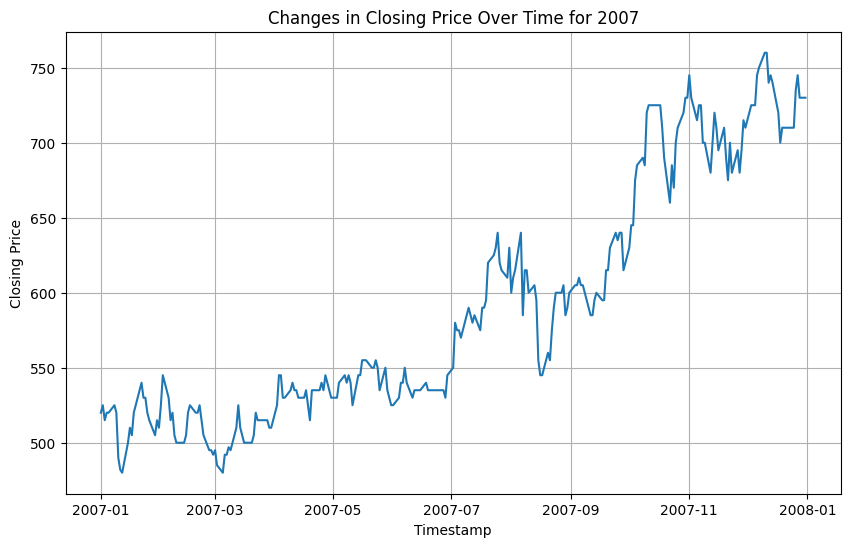

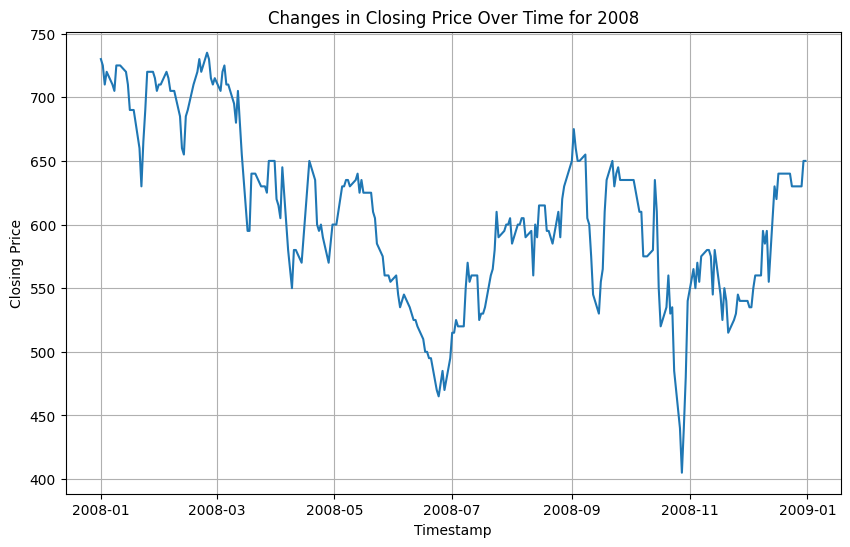

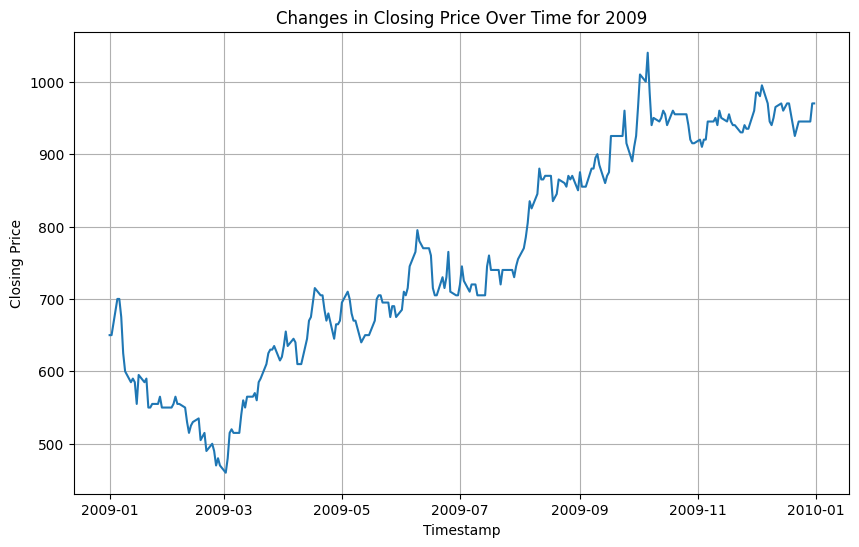

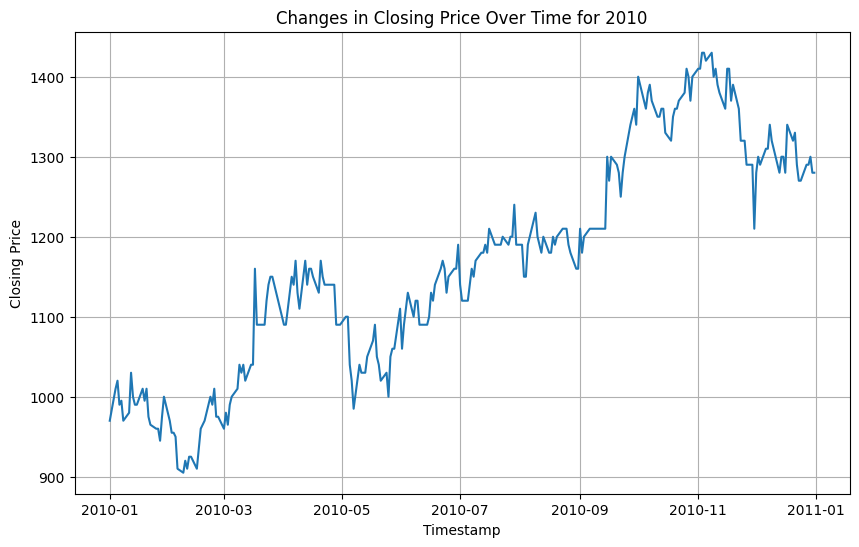

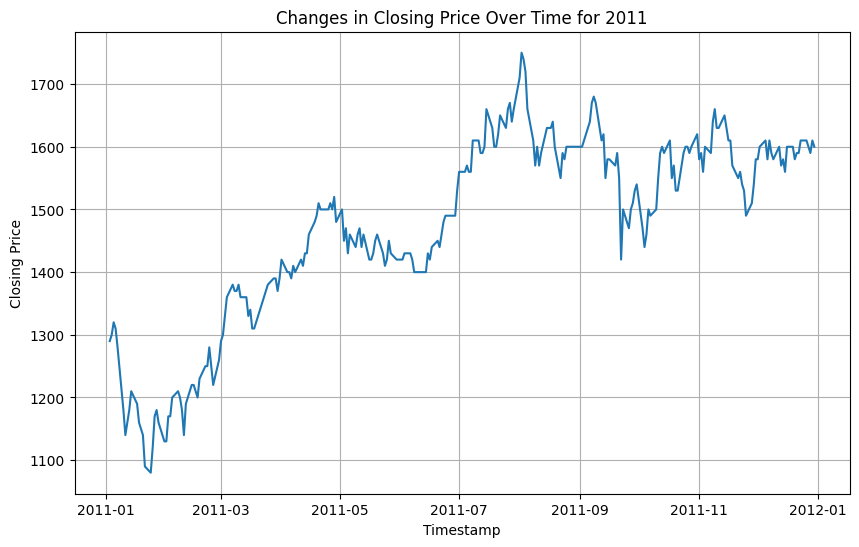

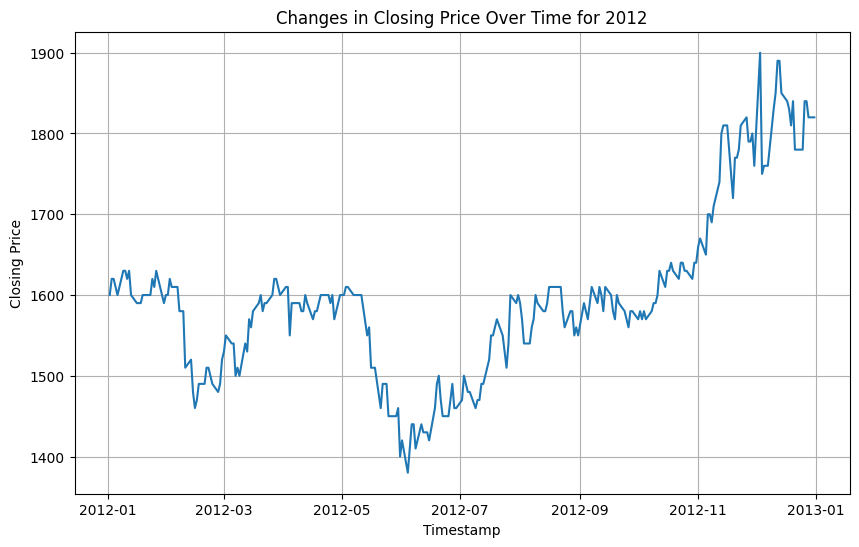

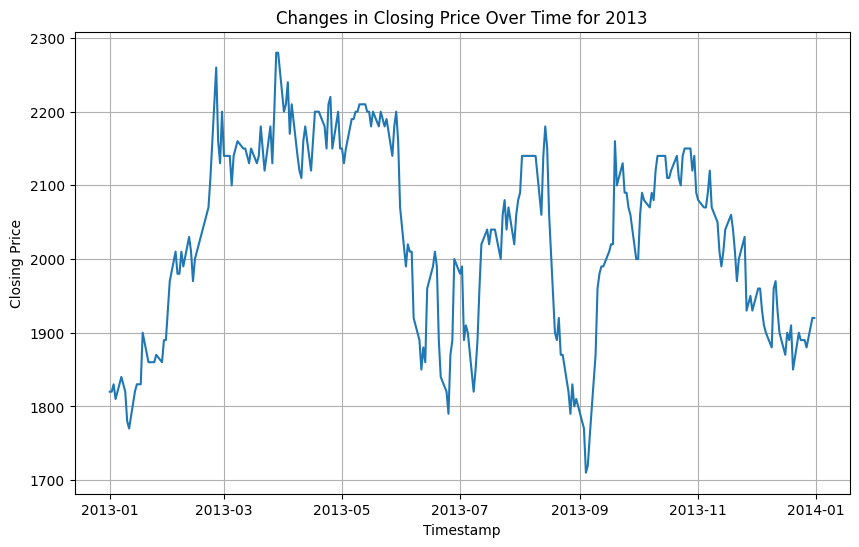

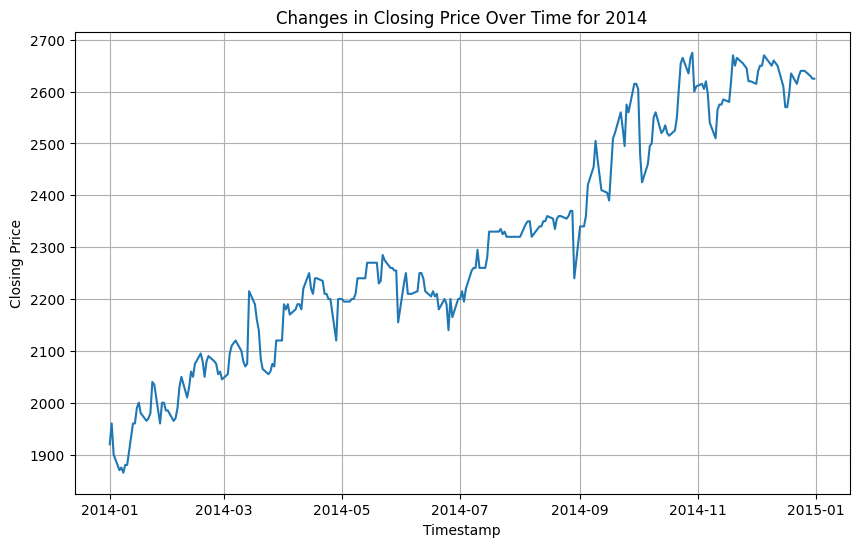

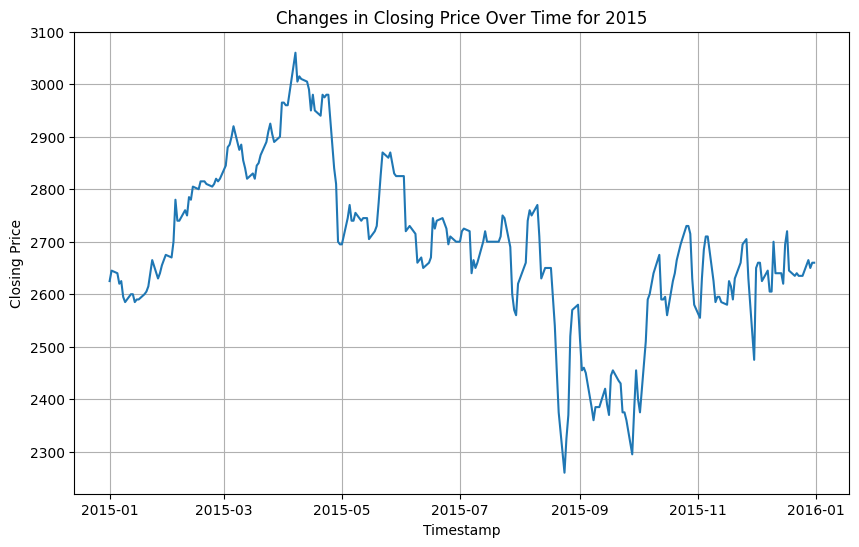

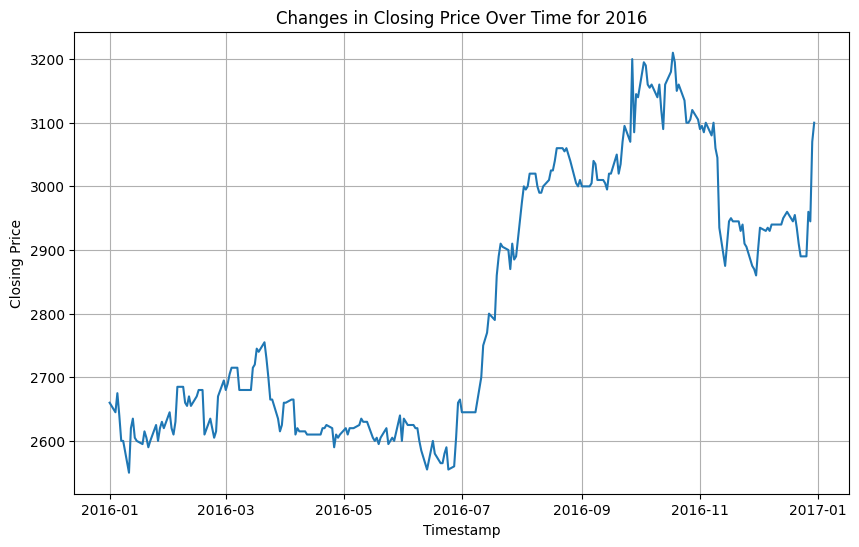

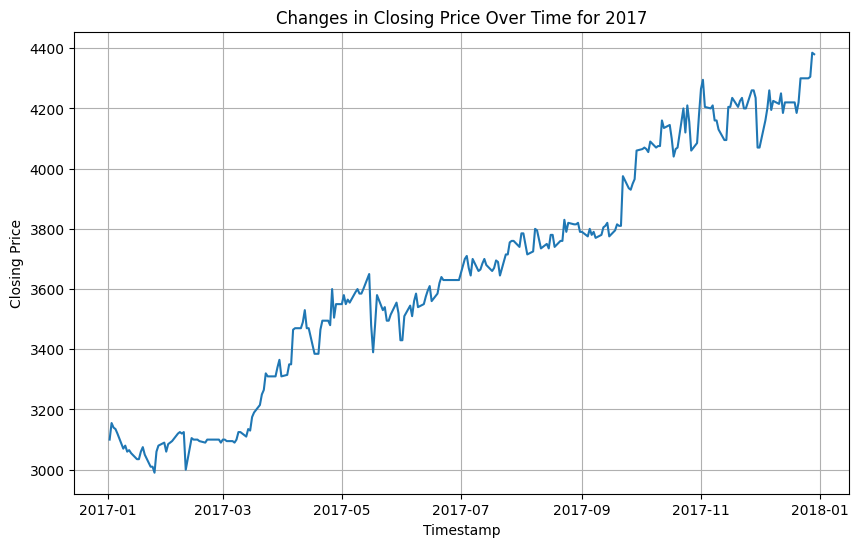

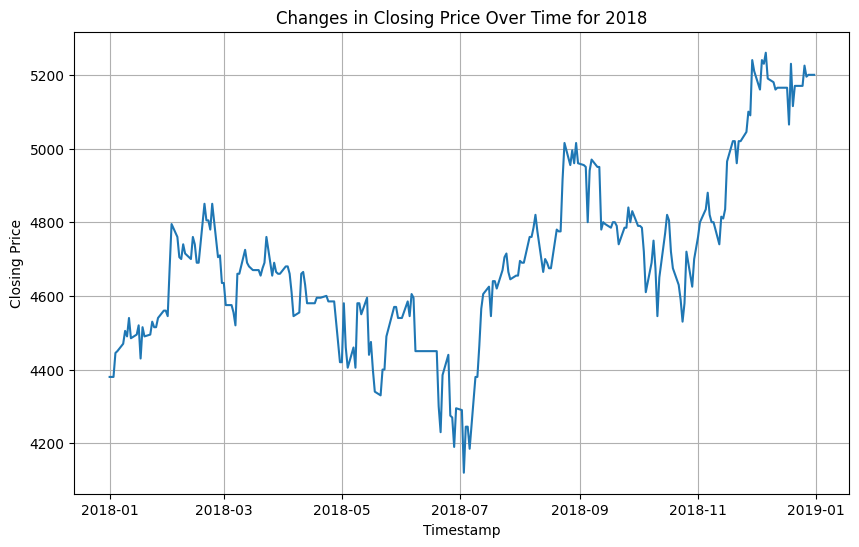

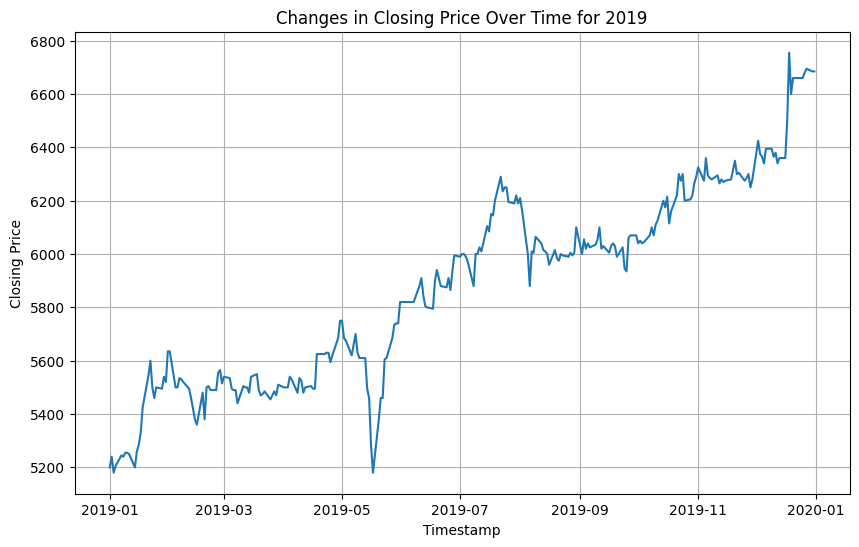

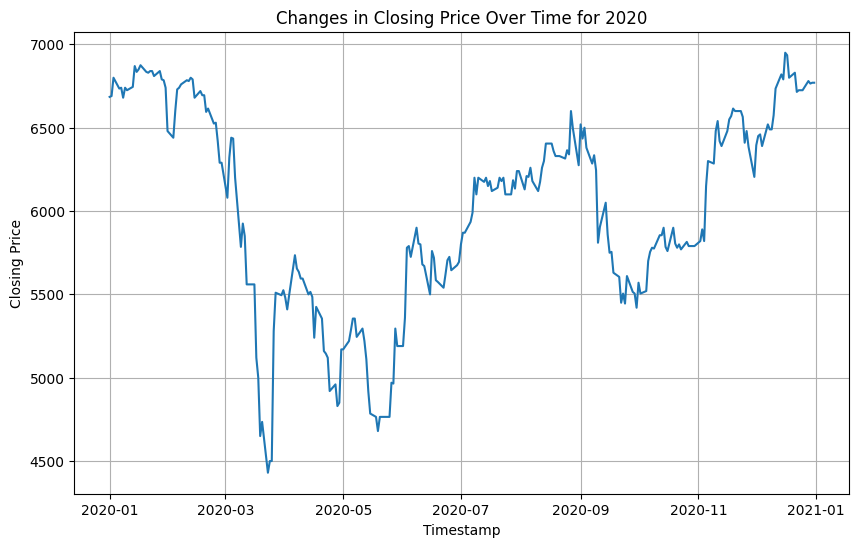

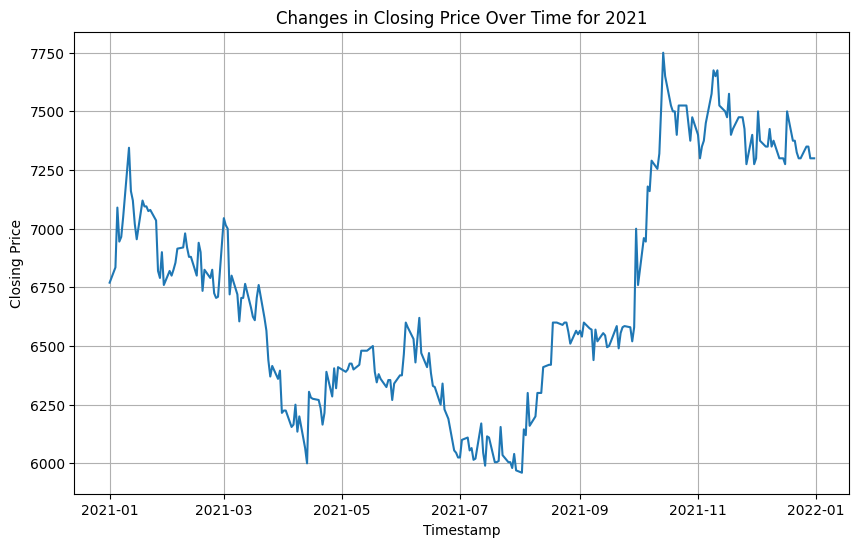

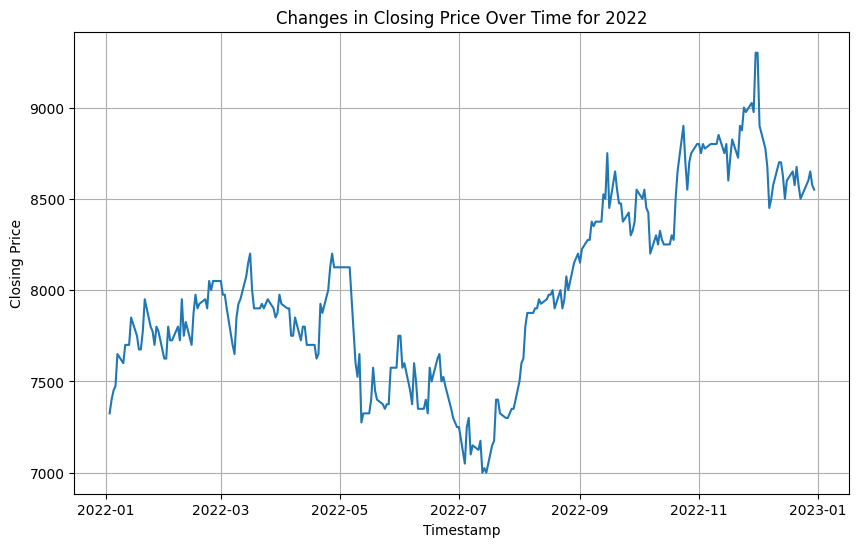

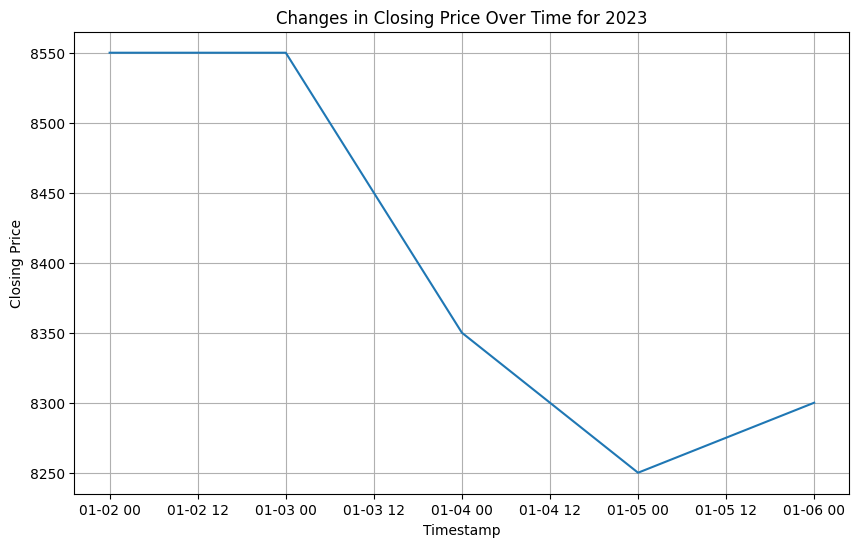

In [28]:
yearly_data = df.groupby(df.index.year)

for year, data in yearly_data:
    plt.figure(figsize=(10, 6))
    plt.plot(data['close'])
    plt.title(f'Changes in Closing Price Over Time for {year}')
    plt.xlabel('Timestamp')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()


In [29]:
df = df[df.index >= '2005-01-01']
print(df.head())

            open  low  high  close
timestamp                         
2005-01-03   295  292   295    295
2005-01-04   295  295   302    300
2005-01-05   300  300   315    307
2005-01-06   310  302   310    307
2005-01-07   305  292   305    295


In [30]:
df.describe()

,open,low,high,close
count,4700.000000,4700.000000,4700.000000,4700.000000
mean,2879.720000,2849.962340,2908.341702,2879.926809
std,2362.718805,2341.800939,2383.651702,2362.714225
min,277.000000,272.000000,282.000000,277.000000
25%,740.000000,730.000000,750.000000,745.000000
50%,2140.000000,2120.000000,2170.000000,2140.000000
75%,4680.000000,4630.000000,4710.000000,4675.000000
max,9050.000000,8975.000000,9400.000000,9300.000000


In [31]:
correlation_matrix = df.corr()
print(correlation_matrix)

           open       low      high     close
open   1.000000  0.999880  0.999828  0.999768
low    0.999880  1.000000  0.999787  0.999872
high   0.999828  0.999787  1.000000  0.999860
close  0.999768  0.999872  0.999860  1.000000


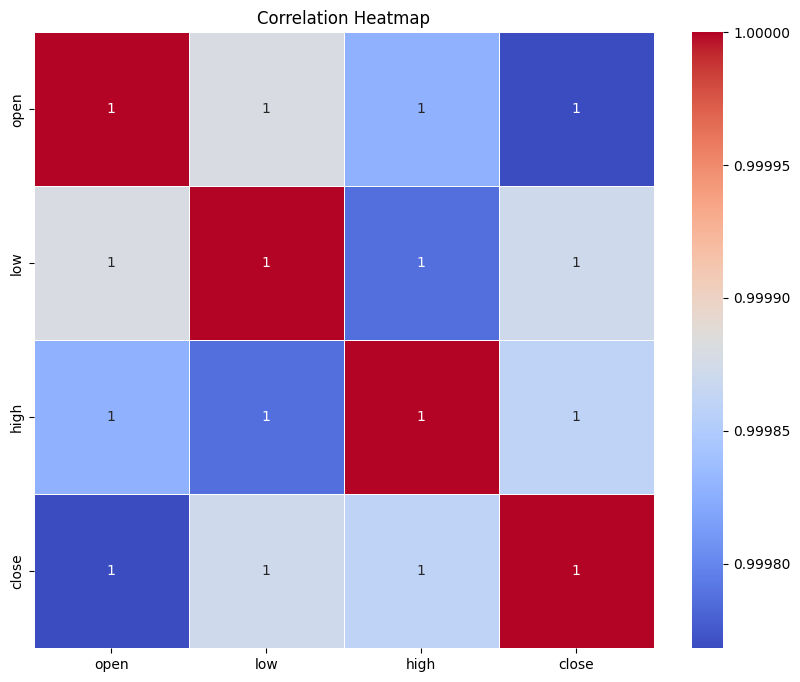

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
X = df[['open', 'high', 'low']]
y = df['close']

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3760, 3)
y_train shape: (3760,)
X_test shape: (940, 3)
y_test shape: (940,)


In [35]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [36]:
print("Coefficients:", model.coef_)
print("Constant:", model.intercept_)

Coefficients: [-0.34438165  0.60912149  0.73630675]
Constant: 1.5139286607427493


In [37]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


comparison_test = pd.DataFrame({'Actual (close)': y_test, 'Predicted (close)': y_pred_test})
comparison_train = pd.DataFrame({'Actual (close)': y_train, 'Predicted (close)': y_pred_train})

print(comparison_test.head(10))
print(comparison_train.head(10))


            Actual (close)  Predicted (close)
timestamp                                    
2021-09-15            6495        6512.231081
2014-05-06            2200        2215.362936
2006-05-12             450         455.612820
2008-12-01             540         539.535384
2010-09-29            1360        1348.211160
2022-11-25            8975        8937.302589
2009-06-29             705         715.752673
2016-03-30            2625        2668.854132
2008-08-22             585         596.263008
2013-08-30            1810        1800.378656
            Actual (close)  Predicted (close)
timestamp                                    
2012-01-10            1630        1631.948022
2013-05-03            2150        2145.129183
2009-09-17             925         912.891005
2018-01-30            4560        4630.270616
2021-01-14            7020        7042.760396
2008-02-11             685         686.248556
2007-05-17             555         549.731720
2016-12-16            2960        

In [38]:
open = 2655
high = 2660
low = 2610
y_pred_manual = 0.7328694031302803 - (0.32583708 * open) + (0.59517235 * high) + (0.73197446 * low)
y_pred_manual

2629.24721360313

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Training Set:")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R-squared:", r2_train)

print("\nTesting Set:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test)


Training Set:
MSE: 792.346294603124
RMSE: 28.148646408009107
R-squared: 0.9998574468555654

Testing Set:
MSE: 791.8867791173509
RMSE: 28.140482922603706
R-squared: 0.9998603846586809


In [40]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import ipywidgets as widgets
from IPython.display import display

url = 'https://github.com/GPadaka19/BBCA-Price-Prediction/blob/main/BBCA.csv?raw=true'
df = pd.read_csv(url)
df = df.drop('volume', axis=1)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df = df[df.index >= '2012-01-01']

X = df[['open', 'high', 'low']]
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

open_input = widgets.FloatText(description="Open:")
high_input = widgets.FloatText(description="High:")
low_input = widgets.FloatText(description="Low:")
button = widgets.Button(description="Predict")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        try:
            open_val = open_input.value
            high_val = high_input.value
            low_val = low_input.value

            if not (open_val and high_val and low_val):
                last_row = df.iloc[-1]
                open_val = last_row['open']
                high_val = last_row['high']
                low_val = last_row['low']
                print("Using values from the last row:")

            prediction = model.predict([[open_val, high_val, low_val]])[0]
            print(f"Predicted Close Price: {prediction:.2f}")
        except Exception as e:
            print(f"Error: {e}")

button.on_click(on_button_clicked)
display(open_input, high_input, low_input, button, output)

FloatText(value=0.0, description='Open:')

FloatText(value=0.0, description='High:')

FloatText(value=0.0, description='Low:')

Button(description='Predict', style=ButtonStyle())

Output()